### 최적화 기초

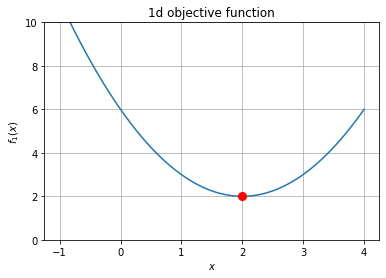

In [1]:
# 최적화 문제 - 함수 f의 값을 max or min화 하는 변수x의 값 x*를 찾는 것
# x∗=argmaxf(x) or x*=argminf(x) == 최적화 문제의 해
# 최소화 문제를 풀 수 있을 때, f(x)를 -f(x)로 바꾸어 최소화 문제를 풀면 최대화 문제가 풀림.
# 따라서 보통은 최소화 문제만 고려함
# f(x):목적/비용/손실/오차함수.(J/C/L/E)
import numpy as np
import matplotlib.pyplot as plt
def f1(x):
    return(x-2)**2+2
xx=np.linspace(-1,4,100); yy=f1(xx)
plt.plot(xx,yy); plt.plot(2,2,'ro',ms=8)
plt.ylim(0,10)
plt.xlabel('$x$'); plt.ylabel('$f_1(x)$'); plt.title('1d objective function')
plt.grid(True); plt.show()
# 이 경우의 최저점은 x*=2임을 알 수 있음
# + 로젠브록 함수 어쩌구 나오는데 몰라도 될듯

In [2]:
# 그리드 서치와 수치적 최적화
# 최소화 문제를 푸는 가장 간단한 방법은
# x의 값을 여러개 넣어 보고 그중 가장 작은 값을 선택하는 그리드 서치 방법.
# 하지만 예측 모형을 만들 때 목적함수값(=예측 오차)를 구하려면 너무나 많은 연산이 필요함
# 따라서 수치적 최적화를 사용 - 함수 위치가 최적점이 될 때까지 최소한의 횟수만큼만 x를 이동시키는것
# 수치적 최적화에 필요한 알고리즘
#   - 현재위치 x_k가 최적점인지 판단하는 알고리즘
#   - 어떤위치 x_k를 시도 후 다음 시도 위치 x_(k+1)를 찾는 알고리즘

first try  : x_1=0.00, g_1=-4.00
second try : x_1=1.60, g_1=-0.80
third try  : x_1=1.92, g_1=-0.16


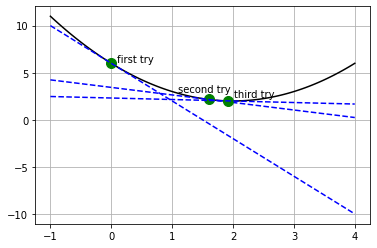

In [3]:
# 기울기 필요조건 - 현재 위치x가 최소점인지 판별하는 알고리즘
# 어떤 독립변수 값 x*가 최소점이려면 x*에서의 기울기와 도함수값이 0임을 만족해야함.
# 단일 변수 함수인경우: df(x)/dx=0
# 다변수 함수인경우: 모든 변수에 대한 편미분값=0 ∇f=g=0
# 기울기가 0이라고 반드시 최소점은 아니지만 모든 최소점은 기울기가 0임.
# 반대로 최고점일 수도 있음 ㅋㅋ - 따라서 2차도함수를 계산. 양수면 최소점, 음수면 최대점이됨.

# 최대경사법 - 현재 위치x_k에서 기울기 값만을 이용하여 다음번 위치 x_(k+1)을 결정하는 방법
# x_k에서 기울기가 음수면 앞으로 진행. 양수면 뒤로 진행
# 이때 위치를 옮기는 거리를 결정하는 비례상수 μ를 스텝 사이즈라 함.
# μ는 사용자 경험혹은 특정한 알고리즘에 따라 사용한다.
# x_(k+1) = x_k - μ∇f(x_k)
def f1d(x):
    '''df1(x)/dx'''
    return 2*(x-2.0)
xx=np.linspace(-1,4,100)
plt.plot(xx,f1(xx),'k-')
mu=0.4 # step size 만약 너무 크거나 너무 작으면 최적화에 차질이 생김
# 1차 시도
x=0
plt.plot(x,f1(x),'go',ms=10)
plt.text(x+0.1,f1(x)+0.1,'first try')
plt.plot(xx,f1d(x)*(xx-x)+f1(x),'b--') # f1d(x)=기울기 | (xx-x)=사실상(x-a)형태 | f1(x)=y절편
print('first try  : x_1={:.2f}, g_1={:.2f}'.format(x,f1d(x)))
# :.2f가 .format의 실수값 넣는거인듯?
# 2차 시도
x=x-mu*f1d(x)
plt.plot(x,f1(x),'go',ms=10)
plt.text(x-0.5,f1(x)+0.8,'second try')
plt.plot(xx,f1d(x)*(xx-x)+f1(x),'b--')
print('second try : x_1={:.2f}, g_1={:.2f}'.format(x,f1d(x)))
# 3차 시도
x=x-mu*f1d(x)
plt.plot(x,f1(x),'go',ms=10)
plt.text(x+0.1,f1(x)+0.4,'third try')
plt.plot(xx,f1d(x)*(xx-x)+f1(x),'b--')
print('third try  : x_1={:.2f}, g_1={:.2f}'.format(x,f1d(x)))

plt.grid(True); plt.show()

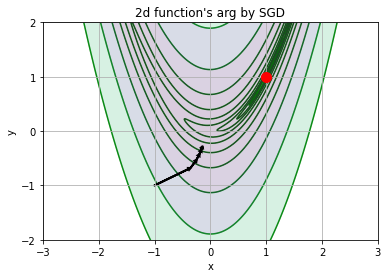

In [4]:
# 로젠브록 함수에 최대 경사법 적용해보기
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2
def f2g(x, y):
    """f2(x, y)의 도함수"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))
xx = np.linspace(-4, 4, 800); yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy);   Z = f2(X, Y)
levels = np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)
mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing
x, y = -1, -1
for i in range(5):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3); plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7)); plt.yticks(np.linspace(-2, 2, 5))
plt.xlabel("x"); plt.ylabel("y")
plt.title("2d function's arg by SGD")
plt.grid(True); plt.show()

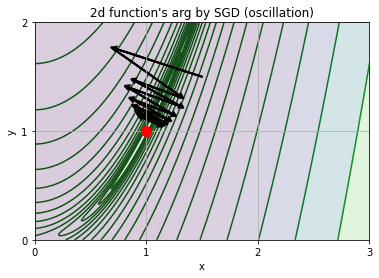

In [5]:
# 곡면의 모양이 계곡(valley)같이 생긴 경우=∇f가 최저점이 아닌경우 진동현상이 발생.
xx = np.linspace(0, 4, 800); yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy);  Z = f2(X, Y)
levels = np.logspace(-1, 4, 20)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)
mu = 1.8e-3; s = 0.95  # 화살표 크기
x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]
plt.xlim(0, 3); plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4)); plt.yticks(np.linspace(0, 2, 3))
plt.xlabel("x"); plt.ylabel("y")
plt.title("2d function's arg by SGD (oscillation)")
plt.grid(True); plt.show()
# 진동현상 해결법은 2차 도함수(헤시안 행렬)을 이용. 모멘텀 방법도 있으나 이는 계산이 어려울때만 사용

In [6]:
# 2차 도함수를 사용한 뉴턴 방법
# 뉴턴 방법 = 목적함수가 2차 함수라는 가정 하에 한 번에 최저점을 찾는 방법
# x_(n+1)=x_n−[Hf(x_n)]^−1*∇f(x_n) 을 사용.
# 따라서 mu가 필요없음. 실제로 2차함수와 비슷한 모양이면 빨리 수렴함.
# 1차 도함수(∇f(x))와 2차 도함수(Hf(x))가 필요한게 단점
# x_(n+1)=x_n −f′(x_n)/f′′(x_n) 모양으로 즉 최적의 mu가 1/f′′(x_n) 임을 보여줌
# 2차 함수라는 가정하에서는 x_n이 어떤 점이건 바로 최저점으로 이동함.

# 준 뉴턴 방법
# 헤시안 함수 대신 현재 위치 x_n 주변의 몇몇 점에서 함수의 값을 구함
# 이를 이용해 2차 도함수의 근사값을 계산하여 사용. BFGS 방법이 많이 사용됨

In [7]:
# Scipy를 이용한 최적화 - minimize(). 알고리즘은 method=? 로 설정가능 기본은 BFGS
# result=minimize(func,x0,jac=jac) func:목적함수, x0:초깃값벡터, jac:g(x) 출력 함수(옵션임)
# 명령의 결과를 나타내는 속성들
# x:최적화 해 | success:최적화 성공여부 | status:종료 상태-최적화 성공시 0반환 |
# message:메시지 문자열 | fun:x위치 함수값 | jac:x위치 g벡터값 |
# hess_inv:x위치 H행렬의 역행렬값 | nfev:f호출횟수 | njev:J호출횟수 | nhev:H호출횟수
# nit:x이동횟수
import scipy.optimize 
def f1(x):
    return (x - 2) ** 2 + 2
x0=0
result = scipy.optimize.minimize(f1, x0) # BFGS방식
result
def f1p(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2)
result2=scipy.optimize.minimize(f1,x0,jac=f1p) # J직접 지정
result2
# 다변수 함수 최적화의 경우에는 목적함수가 벡터 인수를 가져야함.
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2
x0=(-2,-2)
result3=scipy.optimize.minimize(f2,x0)
result3

      fun: 2.0512005854761512e-11
 hess_inv: array([[0.49880143, 0.9976255 ],
       [0.9976255 , 2.00026812]])
      jac: array([ 9.06025525e-07, -5.03171238e-07])
  message: 'Optimization terminated successfully.'
     nfev: 216
      nit: 56
     njev: 72
   status: 0
  success: True
        x: array([0.99999547, 0.99999093])

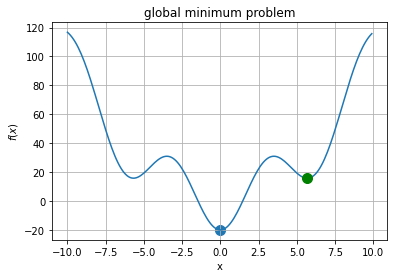

In [8]:
# 전역 최적화 문제 - 함수가 복수의 국소 최저점을 갖는 경우
# 이런 경우에는 수치적 최적화 방법으로 전역 최저점에 도달한다는 보장이 없음
def f_global(x):
    '비선형 목적함수'
    return x**2-20*np.cos(x)
x=np.arange(-10,10,0.1) # =np.linspace(-10,10,100)랑 같은 효과
plt.plot(x,f_global(x))
plt.scatter(0,f_global(0),s=100) # =plt.plot(0,f_global(0),'go',ms=10)랑 같은 효과
plt.xlabel('x'); plt.ylabel('$f(x)$')
plt.title('global minimum problem')
plt.grid(True)
# 초기값이 좋지 않아 전역 최저점으로 수렴 못한 경우.
result = scipy.optimize.minimize(f_global,4); result
x_sol=result['x']
plt.plot(x_sol,f_global(x_sol),'go',ms=10) # 국소 최저점에 수렴해버림
plt.show()
# 이런 경우에는 초기 설정 값이 중요하다고 볼 수 있음

In [9]:
# 컨벡스 문제 - f의 2차 도함수값이 항상 >=0 인 영역에서만 정의된 최적화 문제
# 다변수 함수의 경우 주어진 영역에서 헤시안 행렬이 항상 양의 준정부호임이 조건이됨
# x.THx>=0 for all x
# 컨벡스 문제에서는 항상 전역 최저점이 존재함.
def f2prime(x): # 여기서 입력은 벡터
    return np.array([2*(x[0]-1)+400*x[0]*(x[0]**2 - x[1]),
                     200*x[1]*(x[1]-x[0]**2)])
result=scipy.optimize.minimize(f2,(2,0.3),jac=None)
result

      fun: 2.089434154331796e-11
 hess_inv: array([[0.49022117, 0.98027058],
       [0.98027058, 1.96519149]])
      jac: array([ 1.58933958e-06, -8.86397022e-07])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999543, 0.99999085])

### 제한조건이 있는 최적화 문제

C:\Users\user\AppData\Local\Temp\ipykernel_6848\4234159627.py:11: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(X1,X2,Y,color='gray',levels=[0.5,2,8,32])


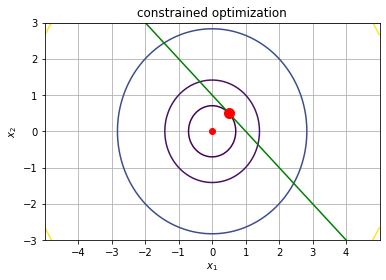

In [10]:
# 등식 제한조건이 있는 최적화 문제 - 제한조건이 있는 가장 간단한 경우
# f(x1,x2)=x1^2+x2^2, g(x1,x2)=x1+x2-1=0 인 경우를 생각해보자.
import numpy as np
import matplotlib.pyplot as plt
def f1(x1,x2):
    return x1**2+x2**2
x1=np.linspace(-5,5,100); x2=np.linspace(-3,3,100)
X1,X2=np.meshgrid(x1,x2)
Y=f1(X1,X2)
x2_g=1-x1
plt.contour(X1,X2,Y,color='gray',levels=[0.5,2,8,32])
plt.plot(x1,x2_g,'g-')
plt.plot(0,0,'ro')
plt.plot([0.5],[0.5],'ro',ms=10)
plt.xlim(-5,5); plt.ylim(-3,3)
plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.xticks(np.linspace(-4,4,9))
plt.title('constrained optimization'); plt.grid(True); plt.show()
# g(x1,x2)=0으로 정의되는 직선에서 f(x1,x2)가 작아지는 점(x1*,x2*)을 찾는 문제

In [11]:
# 라그랑주 승수법
# 등식 제한조건이 있는 최적화 문제 풀이에 용이함.
# 본래의 목적함수f대신 제한조건 등식에 λ를 곱해 새로운 함수 만들어냄
# h(x,λ)=f(x)+∑j=1~M λ_j*g_j(x)를 목적함수로 사용
# 제한조건 등식 하나마다 새로운 λ_j를 추가해야함. 제한조건M개=M개의 λ변수(λ1,..,λm)
# 이렇게 조건이 늘어나기 때문에 그레디언트 벡터를 0으로 만드는 최적화 조건이 N+M개가 됨
# 풀었을때 x1,...,xn이 찾는 최소값 x가 됨

# 예제
# h(x1,x2,λ)=f(x1,x2)+λg(x1,x2)=x1^2+x2^2+λ(x1+x2−1)
# ∂h/∂x1 = 2x1+λ =0 | ∂h/∂x2 = 2x2+λ =0 | ∂h/∂λ = g = x1+x2-1 =0
# 풀면 x1=x2=1/2, λ=-1이됨

# 라그랑주 승수의 의미
# 최적화 문제에 제한조건gi가 있는가 없는가에 따라 해의 값이 달라진다면
# 이 등식 제한조건에 대응하는 라그랑주 승수 λi는 =! 0 임.(0이 아님)
# λi = 0 일때만 원래의 문제와 제한조건이 있는 문제의 최적화 조건이 같아지므로
# 최적화 해의 위치도 같게 나오기 때문
# 예제
# f(x)=x1^2+x2^2이면 최소화 문제의 답은 x1=x2=0
# g(x1,x2)=x1+x2=0 이라면 새로운 목적함수 h는
# h(x1,x2,λ)=f(x1,x2)+λg(x1,x2)=x1^2+x2^2+λ(x1+x2)이고
# 최적화 조건은 2x1+λ=0, 2x2+λ=0, x1+x2=0 으로 풀면 x1=x2=λ=0이됨.
# 따라서 제한조건이 있으나 없으나 해가 같고 λ는 0이됨.

In [12]:
# scipy를 이용한 등식 제한조건이 있는 최적화 문제 계산
# fmin_slsqp(fnc,x0,eqcons=[f1,f2,..]) fnc=목적함수,x0=초기값,eqcons=제한조건 리스트
from scipy.optimize import fmin_slsqp
def f1array(x): return x[0]**2+x[1]**2
def eq_constraint(x): return x[0]+x[1]-1
fmin_slsqp(f1array,np.array([1,1]),eqcons=[eq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5000000000000002
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


array([0.5, 0.5])

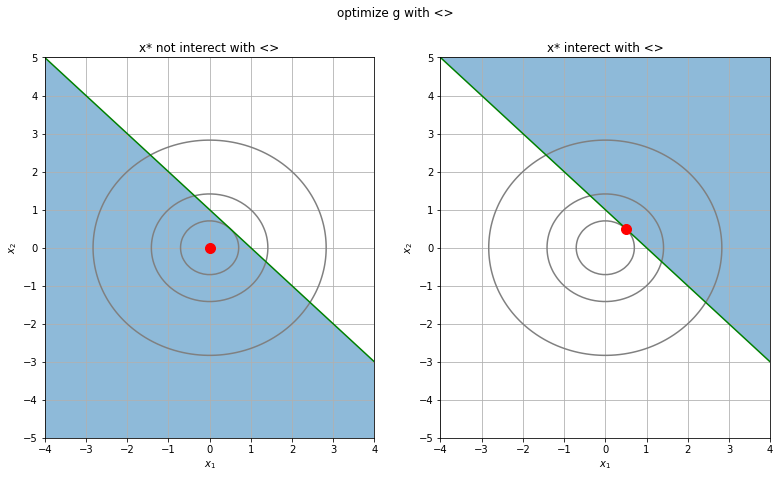

In [13]:
# 부등식 제한조건이 있는 최적화 문제
# g_j(x)<=0 인 제한조건이 있는 경우 - 만약 g>=0이면 -를 곱하면 됨
# 목적함수를 바꾸는건 똑같음 h사용. f(x)+Sj=1~M λ_j*g_j(x)
# 다만 이 경우, 최적화 해의 필요조건은 방정식 제한조건 문제와 다르게 KKT조건이라함.
# KKT조건 1. 모든 독립 변수 x1,x2,..,xn에 대한 미분값이 0 = ∂h(x,λ)/∂xi
#            - 라그랑주 승수에 대한 미분은 0이 아니여도 됨.
# KKT조건 2. 모든 λ1,λ2,..,λM과 제한조건 부등식의 곱이 0 = λj*∂h(x,λ)/∂λj
# KKT조건 3. 라그랑주 승수는 음수가 아니다. λj >= 0

# 예제
# f(x1,x2)=x1^2+x2^2, g는 두가지 경우로 나누어 보겠음
# g(x1,x2)= x1+x2-1 <=0, -x1-x2+1 <=0
plt.figure(figsize=(13,7))
ax1=plt.subplot(121)
plt.contour(X1,X2,Y,colors='gray',levels=[0.5,2,8])
plt.plot(x1,x2_g,'g-')
ax1.fill_between(x1,-20,x2_g,alpha=0.5)
plt.plot([0],[0],'ro',ms=10)
plt.xlim(-3,3); plt.ylim(-5,5)
plt.xticks(np.linspace(-4,4,9)); plt.yticks(np.linspace(-5,5,11))
plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.title('x* not interect with <>'); plt.grid(True)
ax2=plt.subplot(122)
plt.contour(X1,X2,Y,colors='gray',levels=[0.5,2,8])
plt.plot(x1,x2_g,'g-')
ax2.fill_between(x1,20,x2_g,alpha=0.5)
plt.plot([0.5],[0.5],'ro',ms=10)
plt.xlim(-3,3); plt.ylim(-5,5)
plt.xticks(np.linspace(-4,4,9)); plt.yticks(np.linspace(-5,5,11))
plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.title('x* interect with <>')
plt.suptitle('optimize g with <>')
plt.grid(True); plt.show()
# 이렇게 부등식 제한조건이 있는 최적화 문제에서 제한조건은 두경우중 하나
# 결과에 영향을 주지않는 쓸모없는 제한조건 or 결과에 영향을 주는 등식인 제한조건
# 따라서 gi=0,λi=!0 or gi=!0,λi=0 두 경우로 나누어 각각 풀어본다.

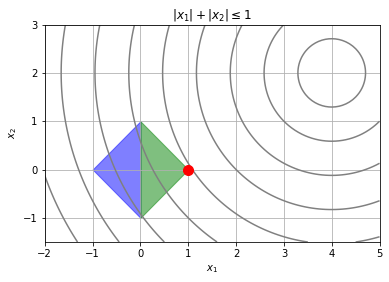

In [14]:
# 복수의 부등식 제한조건이 있는 2차원 최적화 문제의 예시
# argmin(x1-4)^2+(x2-2)^2
# g1(x)=x1+x2-1<=0 | g2(x)=-x1+x2-1<=0 | g3(x)=-x1-x2-1<=0 | g4(x)=x1-x2-1<=0
# 하나로 나타내면 g(x)=|x1|+|x2|−1=∑i=1~2 |xi| −1≤0
def f2plt(x1,x2):
    return np.sqrt((x1-4)**2+(x2-2)**2) # 근데 왜 여기 np.sqrt하는지 모르겠네
x1=np.linspace(-2,5,100); x2=np.linspace(-1.5,3,100)
X1,X2=np.meshgrid(x1,x2); Y=f2plt(X1,X2)
plt.contour(X1,X2,Y,colors='gray',levels=np.arange(0.5,5,0.5)*np.sqrt(2))
k=1 # 제한조건 상수
ax=plt.gca() # Axes객체 반환
x12=np.linspace(-k,0,10); x13=np.linspace(0,k,10)
# 두 수평 방향 곡선 사이를 채움 - 근데 이렇게 위치 인수가 3개가 들어간 경우는
# x범위, y범위1, y범위2 로 두 그래프 사이를 칠하는 역할을 함.
ax.fill_between(x12,x12+k,-k-x12,color='b',alpha=0.5) 
ax.fill_between(x13,x13-k,k-x13,color='g',alpha=0.5) 
x1_sol=1; x2_sol=0
plt.plot(x1_sol,x2_sol,'ro',ms=10)
plt.xlim(-2,5); plt.ylim(-1.5,3)
plt.xticks(np.linspace(-2,5,8)); plt.yticks(np.linspace(-1,3,5))
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.title('$|x_1| + |x_2| \leq {}$'.format(k))
plt.grid(True); plt.show()

In [15]:
# scipy를 이용한 부등식 제한조건이 있는 최적화 문제 계산
# fmin_slsqp(fnc,x0,ieqcons=[]) fnc:목적함수,x0:초기값,ieqcons:부등식 제한조건
# 단 여기서 ieqcons 인수에 들어가는 부등호의 부호는 g>=0이어야 함.
# 사실 fmin_slsqp는 등식 제한조건과 부등식 제한조건을 동시에 사용가능
def f2(x):
    return np.sqrt((x[0]-4)**2+(x[1]-2)**2)
k=1
def ieq(x):
    return np.atleast_1d(k-np.sum(np.abs(x)))
# 이건 잘 모르겠고 그냥 return 1-np.abs(x[0])-np.abs(x[1]) 쓰면 될듯
# 아 같은 말이네 ㅋㅋㅋ 병신같네 ㄹㅇ
# np.atleast_1d 입력값을 1차원 이상의 배열로 변환
# np.abs 절대값으로 출력
fmin_slsqp(f2,np.array([0,0]),ieqcons=[ieq])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.605551280732028
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11


array([9.99999981e-01, 1.89941792e-08])

### 선형계획법 문제와 이차계획법 문제

In [16]:
# 선형계획법 문제
# 방정식이나 부등식 제한 조건을 가지는 선형 모형을 최소화하는 문제(=LP 문제)
# argmin c.Tx가 목적함수. Ax=b 등식 제한조건, x>=0 부등식 제한조건 = 선형계획법 문제의 기본형

# scipy를 이용한 선형계획법 문제 계산
# linprog(c,A,b) c:목적함수 계수벡터, A:등식 제한조건의 계수행렬, b:등식 제한조건의 상수 벡터
from scipy.optimize import linprog
A=np.array([[-1,0],[0,-1],[1,2],[4,5]])
b=([-100,-100,500,9800])
c=np.array([-3,-5])
result = linprog(c,A,b)
result

     con: array([], dtype=float64)
     fun: -1399.999994807381
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([1.99999991e+02, 4.19920389e-06, 3.31138381e-07, 8.10000001e+03])
  status: 0
 success: True
       x: array([299.99999127, 100.0000042 ])

In [17]:
# CVXPY를 이용한 선형계획법 문제 계산
# 좀 더 직관적, 변수나 조건이 많으면 연산이 느려짐
import cvxpy as cp
# 변수 정의: A생산량, B생산량
a=cp.Variable(); b=cp.Variable()
# 조건 정의
constraints = [a >= 100,
               b >= 100,
               a+2*b<=500,
               4*a + 5*b<=9800]
# 문제 정의
obj=cp.Maximize(3*a+5*b)
prob=cp.Problem(obj,constraints)
prob.solve() # 계산
#결과
print('상태:',prob.status)
print('최적값:',a.value,b.value)

상태: optimal
최적값: 299.99999911572195 100.00000058337798


In [20]:
# 이차계획법 문제
# 방정식이나 부등식 제한 조건을 가지는 일반화된 이차형식의 값을 최소화하는 문제(QP 문제)
# 목적함수:(1/2)*x.TQx+c.Tx, 등식 제한조건:Ax=b, 부호 제한조건:x>=0

# CvxOpt를 이용한 이차계획법 문제 계산
# Cvxopt사용시에는 ndarray를 전부 matrix로 바꿔야함. 정수형도 사용 못하므로 부동소수점 실수사용

# f(x1,x2)=x1^2+x2^2, g(x1,x2)=x1+x2-1=0
# f를 이차형식화 하면 (1/2)*[x1 x2]*np.array([[2,0],[0,2]])*[x1 x2].T 로 이차행렬이됨
# H를 만들면 (1/2)*[x1 x2]*np.array([[2,0],[0,2]])*[x1 x2].T + [0 0]*[x1 x2].T
# g는 [1 1]*[x1 x2].T = 1
from cvxopt import matrix, solvers
Q=matrix(np.diag([2.0,2.0])) # 이차형식 행렬
c=matrix(np.array([0.0,0.0])) # h에서 g의 계수벡터
A=matrix(np.array([[1.0,1.0]])) # g의 계수 벡터
b=matrix(np.array([[1.0]])) # g 결과 값?
sol=solvers.qp(Q,c,A=A,b=b)
np.array(sol['x'])

array([[0.5],
       [0.5]])